In [6]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [7]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list the contents of /mydrive
!ls /mydrive

'Colab Notebooks'   Meat-Freshness  'My Drive'


In [8]:
#Navigate to /mydrive/Meat-Freshness
%cd /mydrive/Meat-Freshness
!ls

/content/gdrive/My Drive/Meat-Freshness
Meat_Freshnesss.ipynb  train  valid


In [9]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [10]:
base_dir = 'train'
Fresh_dir = os.path.join(base_dir,'Fresh')
Half_Fresh_dir = os.path.join(base_dir,'Half-Fresh')
Spoiled_dir = os.path.join(base_dir,'Spoiled')

In [11]:
print("Half-Fresh : ",len(os.listdir(Half_Fresh_dir)))
print("Fresh : ",len(os.listdir(Fresh_dir)))
print("Spoiled : ",len(os.listdir(Spoiled_dir)))

Half-Fresh :  629
Fresh :  677
Spoiled :  509


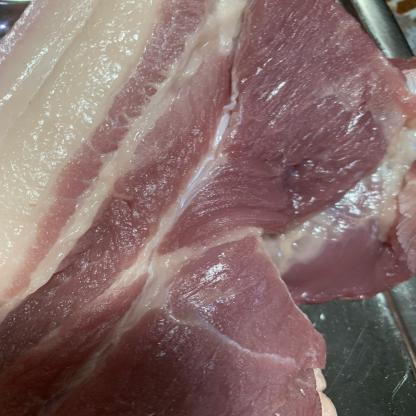

In [12]:
import tensorflow as tf
random_image = random.sample(os.listdir(Fresh_dir), 10)
img = tf.keras.utils.load_img(f"{Fresh_dir}/{random_image[0]}")
img

In [13]:
img = tf.keras.utils.img_to_array(img)
img.shape

(416, 416, 3)

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="training",
  image_size=(180,180),
  batch_size=32,
  seed=42)

Found 1815 files belonging to 3 classes.
Using 1452 files for training.


In [15]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="validation",
  image_size=(180,180),
  batch_size=32,
  seed=42)


Found 1815 files belonging to 3 classes.
Using 363 files for validation.


In [16]:
class_names = train_ds.class_names
class_names

['Fresh', 'Half-Fresh', 'Spoiled']

In [17]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


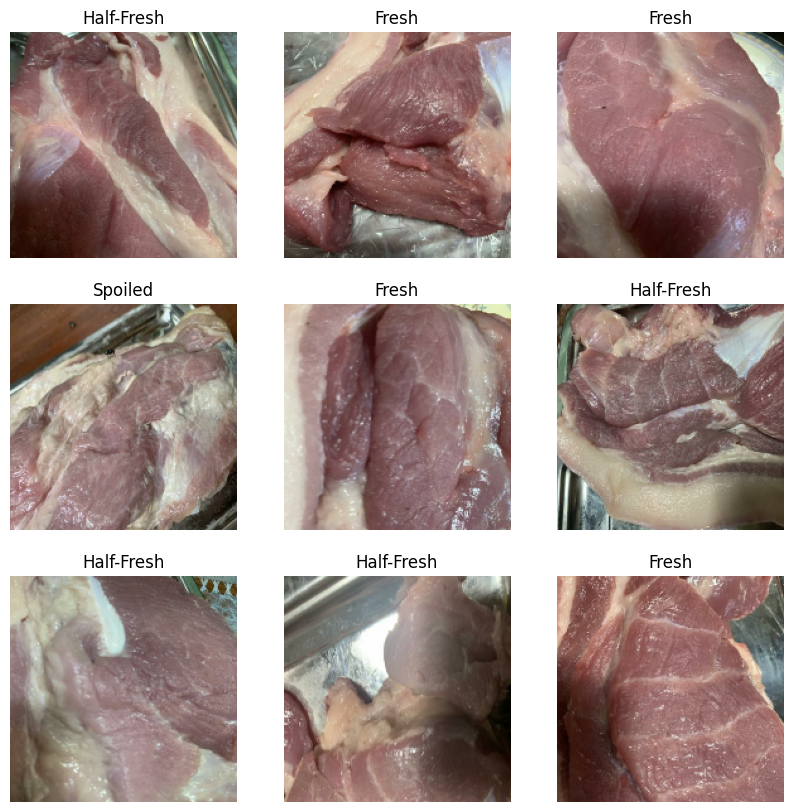

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical", seed=42),
  tf.keras.layers.RandomRotation(0.1, seed=42),
])

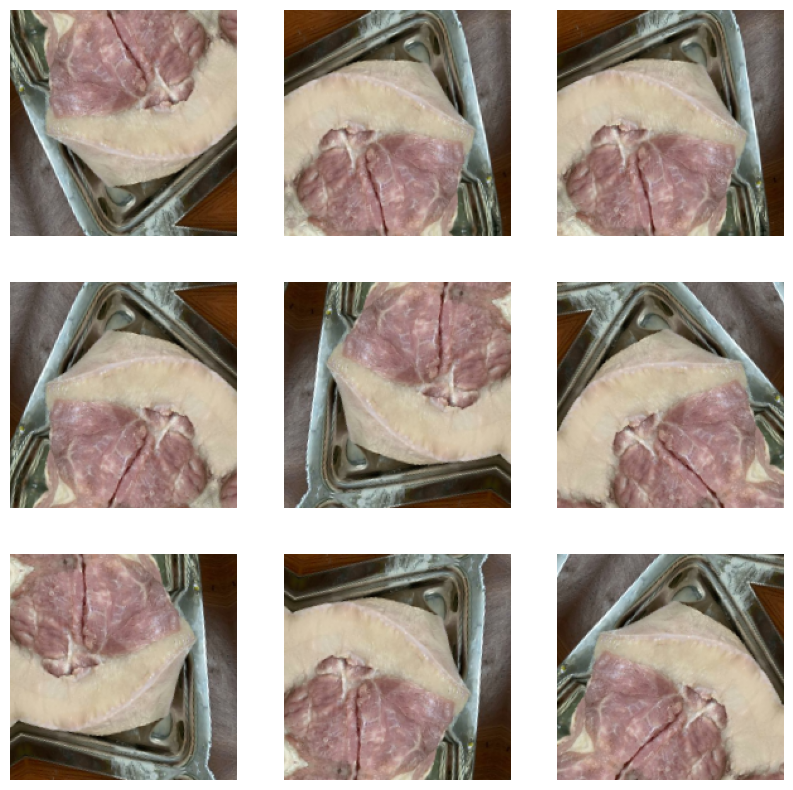

In [21]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [22]:
NUM_CLASSES = len(class_names)
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    data_augmentation,
    # The first CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # The second CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # The third CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # The fourth CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES)
])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 128)       0         
 g2D)                                                 

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [25]:

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15,
)

Epoch 1/15
46/46 [==============================] - 511s 11s/step - loss: 1.1068 - accuracy: 0.3650 - val_loss: 1.0966 - val_accuracy: 0.3361
Epoch 2/15
46/46 [==============================] - 464s 10s/step - loss: 1.0773 - accuracy: 0.4167 - val_loss: 0.8411 - val_accuracy: 0.6198
Epoch 3/15
46/46 [==============================] - 465s 10s/step - loss: 0.8212 - accuracy: 0.5861 - val_loss: 0.7683 - val_accuracy: 0.6694
Epoch 4/15
46/46 [==============================] - 462s 10s/step - loss: 0.6705 - accuracy: 0.6915 - val_loss: 0.5141 - val_accuracy: 0.7603
Epoch 5/15
46/46 [==============================] - 445s 10s/step - loss: 0.6193 - accuracy: 0.7183 - val_loss: 0.4518 - val_accuracy: 0.7796
Epoch 6/15
46/46 [==============================] - 428s 9s/step - loss: 0.5631 - accuracy: 0.7514 - val_loss: 0.4837 - val_accuracy: 0.8017
Epoch 7/15
46/46 [==============================] - 446s 10s/step - loss: 0.5454 - accuracy: 0.7583 - val_loss: 0.4265 - val_accuracy: 0.8264
Epoch 8

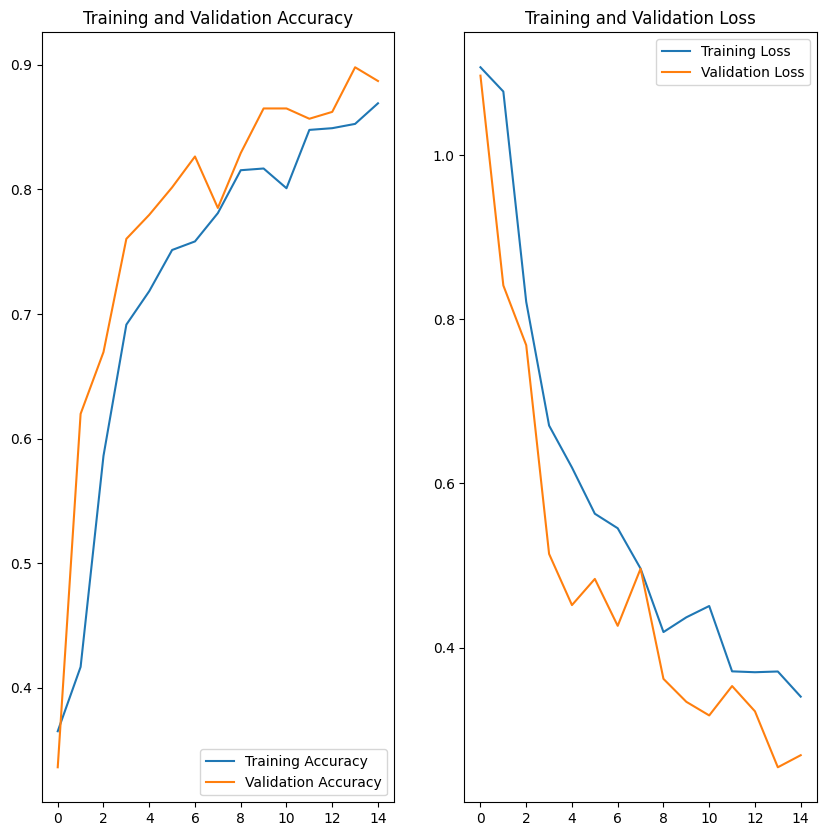

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

12/12 [==============================] - 28s 2s/step
Confusion Matrix:
[[114   7   1]
 [ 27  94   4]
 [  0   2 114]]

Classification Report:
              precision    recall  f1-score   support

       Fresh       0.81      0.93      0.87       122
  Half-Fresh       0.91      0.75      0.82       125
     Spoiled       0.96      0.98      0.97       116

    accuracy                           0.89       363
   macro avg       0.89      0.89      0.89       363
weighted avg       0.89      0.89      0.89       363



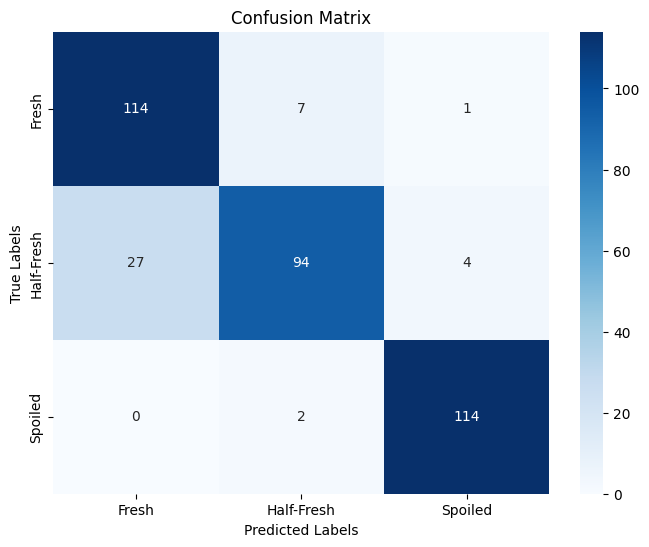

In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' and 'train_ds', 'val_ds' are already defined

# Evaluate the model on the validation set
val_predictions = model.predict(val_ds)
val_true_labels = np.concatenate([y for x, y in val_ds], axis=0)

# Convert predicted probabilities to class labels
val_pred_labels = np.argmax(val_predictions, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(val_true_labels, val_pred_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
class_report = classification_report(val_true_labels, val_pred_labels, target_names=class_names)
print("\nClassification Report:")
print(class_report)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [30]:
from tensorflow.keras.models import load_model
# Save the entire model to a HDF5 file
model.save("Meat_FreshnesssTrainedModel.keras")

In [31]:
Trained_CNN_Model = load_model("Meat_FreshnesssTrainedModel.keras")

1/1 [==============================] - 0s 148ms/step


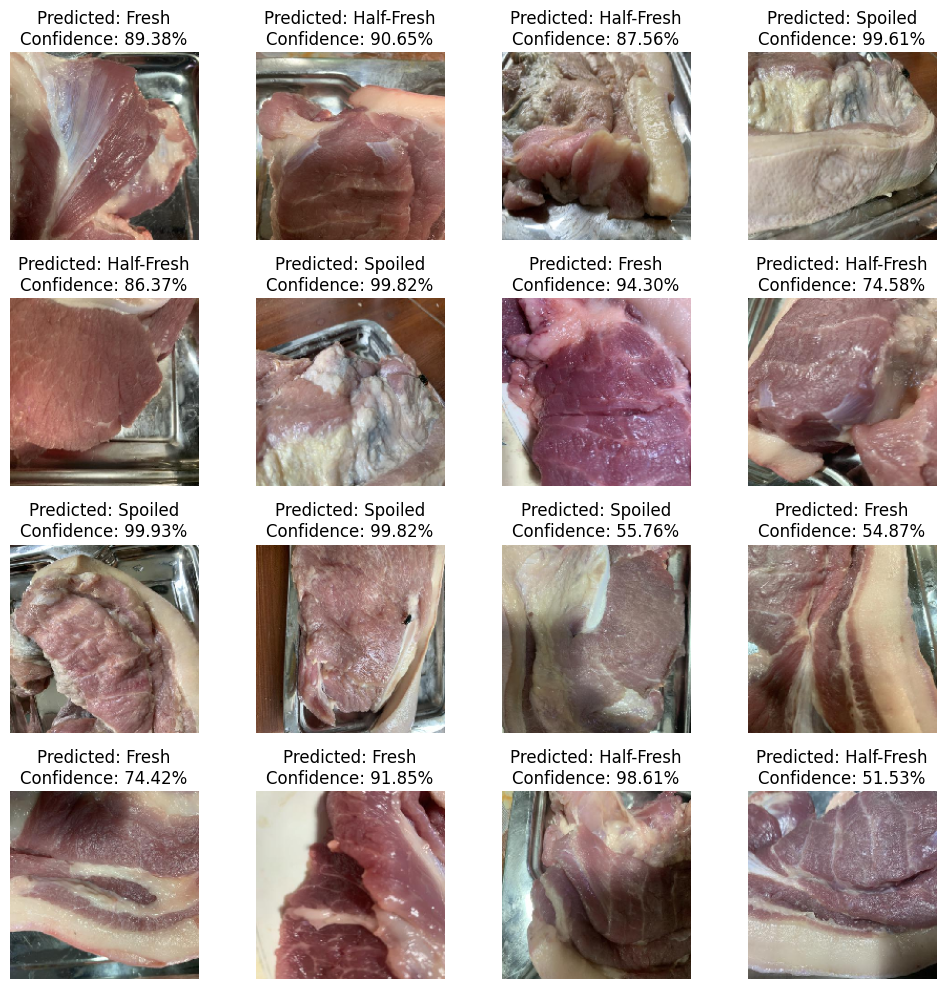

In [36]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming 'model' and 'class_names' are already defined

valid_dir = 'valid'
num_images_to_predict = 16

# Get a list of 16 random images from the 'valid' folder
random_images = random.sample(os.listdir(valid_dir), num_images_to_predict)

# Set up subplots
rows = 4
cols = 4
fig, axs = plt.subplots(rows, cols, figsize=(10, 10))

for i in range(rows):
    for j in range(cols):
        # Load and preprocess the image
        random_image = random_images[i * cols + j]
        img = tf.keras.utils.load_img(f"{valid_dir}/{random_image}", target_size=(180, 180))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)  # Create a batch

        # Make predictions
        predictions = Trained_CNN_Model.predict(img_array)
        score = tf.nn.softmax(predictions[0])

        # Display the image
        axs[i, j].imshow(img)
        axs[i, j].axis("off")

        # Display the prediction results
        axs[i, j].set_title(
            f"Predicted: {class_names[np.argmax(score)]}\n"
            f"Confidence: {100 * np.max(score):.2f}%"
        )

plt.tight_layout()
plt.show()

FileUpload(value={}, description='Upload')

1/1 [==============================] - 0s 144ms/step


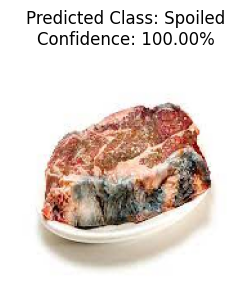

1/1 [==============================] - 0s 87ms/step


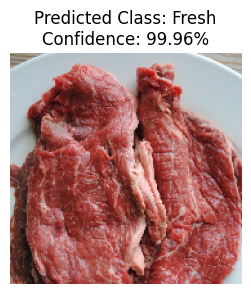

1/1 [==============================] - 0s 155ms/step


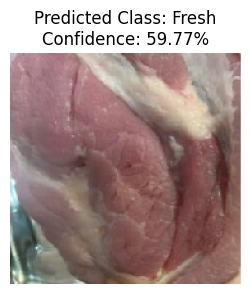

1/1 [==============================] - 0s 84ms/step


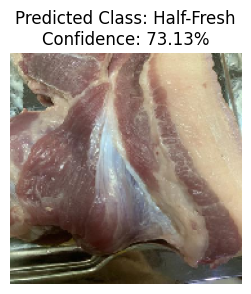

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from ipywidgets import FileUpload
from IPython.display import display

# Assuming 'model' and 'class_names' are already defined

# Function to preprocess the input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to handle image upload and prediction
def handle_upload(change):
    img = list(file_upload.value.values())[0]["content"]
    img_path = "temp_image.jpg"
    with open(img_path, "wb") as f:
        f.write(img)

    # Preprocess the input image
    input_img_array = preprocess_image(img_path)

    # Make prediction
    predictions = model.predict(input_img_array)
    score = tf.nn.softmax(predictions[0])

    # Display the input image with predicted class and confidence
    plt.figure(figsize=(6, 3))
    plt.imshow(image.load_img(img_path, target_size=(180, 180)))
    plt.axis("off")
    plt.title(
        "Predicted Class: {}\n"
        "Confidence: {:.2f}%"
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )
    plt.show()

# Create a FileUpload widget
file_upload = FileUpload()
file_upload.observe(handle_upload, names='value')

# Display the FileUpload widget
display(file_upload)